In [1]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'digit recognizor.csv')

In [4]:
data.shape

(42000, 785)

In [5]:
X = data.iloc[:, 1:]

In [6]:
y = data.iloc[:, 0]

In [7]:
X.shape

(42000, 784)

In [8]:
pca_line = PCA().fit(X)

In [9]:
pca_line.explained_variance_ratio_

array([9.74893769e-02, 7.16026628e-02, 6.14590336e-02, 5.37930200e-02,
       4.89426213e-02, 4.30321399e-02, 3.27705076e-02, 2.89210317e-02,
       2.76690235e-02, 2.34887103e-02, 2.09932543e-02, 2.05900116e-02,
       1.70255350e-02, 1.69278702e-02, 1.58112641e-02, 1.48323962e-02,
       1.31968789e-02, 1.28272708e-02, 1.18797614e-02, 1.15275473e-02,
       1.07219122e-02, 1.01519930e-02, 9.64902259e-03, 9.12846068e-03,
       8.87640859e-03, 8.38766308e-03, 8.11855855e-03, 7.77405747e-03,
       7.40635116e-03, 6.86661489e-03, 6.57982211e-03, 6.38798611e-03,
       5.99367016e-03, 5.88913410e-03, 5.64335178e-03, 5.40967048e-03,
       5.09221943e-03, 4.87504936e-03, 4.75569422e-03, 4.66544724e-03,
       4.52952464e-03, 4.44989164e-03, 4.18255277e-03, 3.97505755e-03,
       3.84541993e-03, 3.74919479e-03, 3.61013219e-03, 3.48522166e-03,
       3.36487802e-03, 3.20738135e-03, 3.15467117e-03, 3.09145543e-03,
       2.93709181e-03, 2.86541339e-03, 2.80759437e-03, 2.69618435e-03,
      

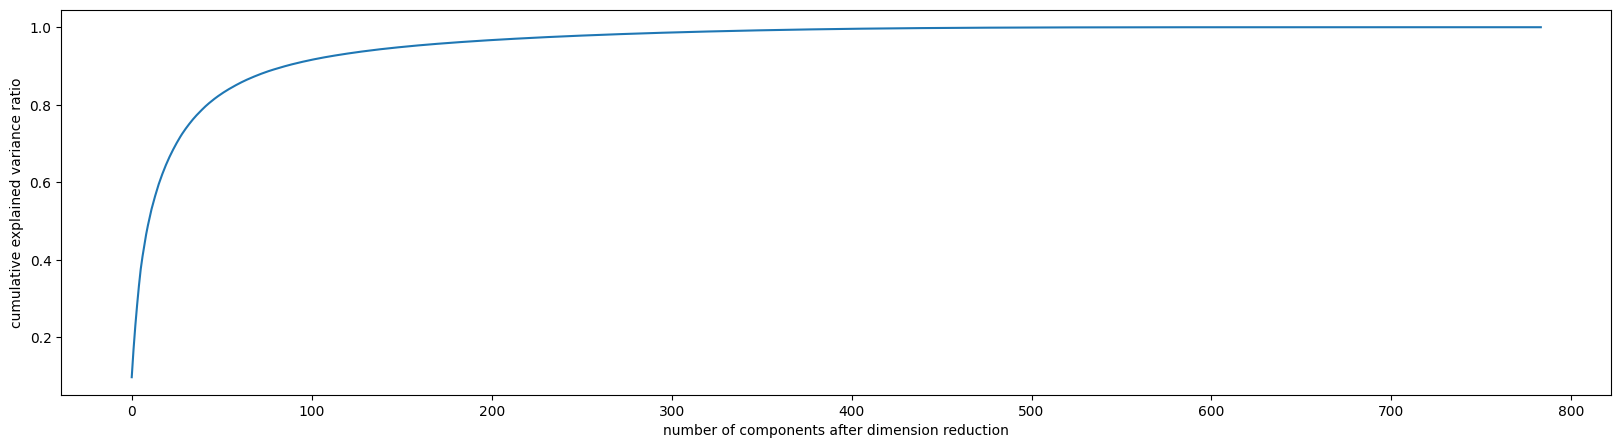

In [10]:
plt.figure(figsize=[20, 5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

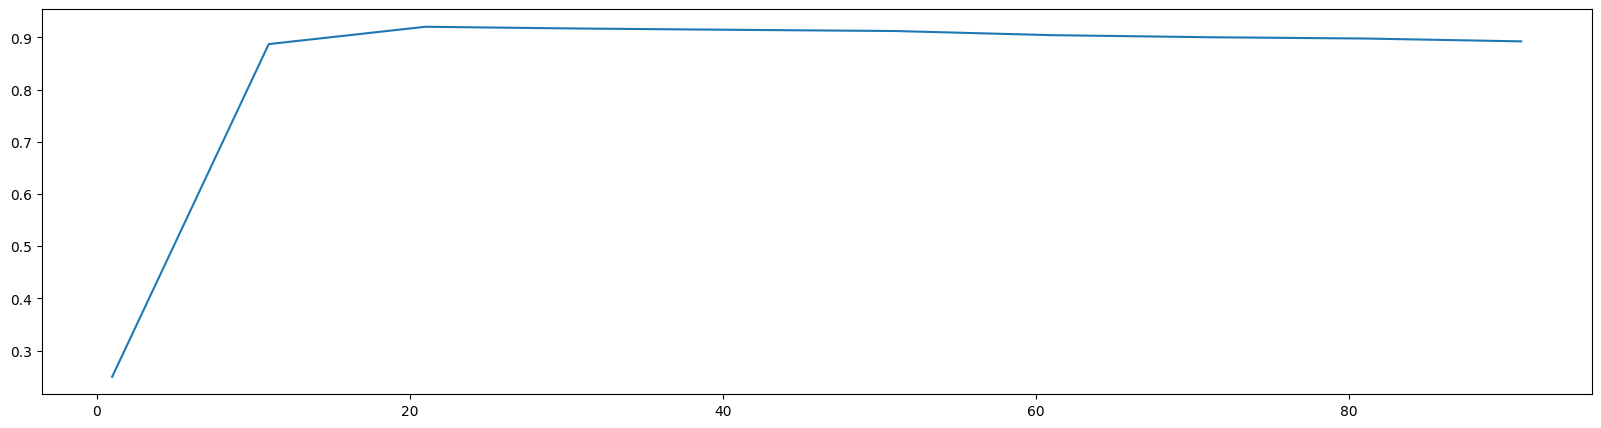

In [11]:
score = []
for i in range(1, 101, 10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10, random_state=0)
                           , X_dr, y, cv=5).mean()
    score.append(once)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 101, 10), score)
plt.show()

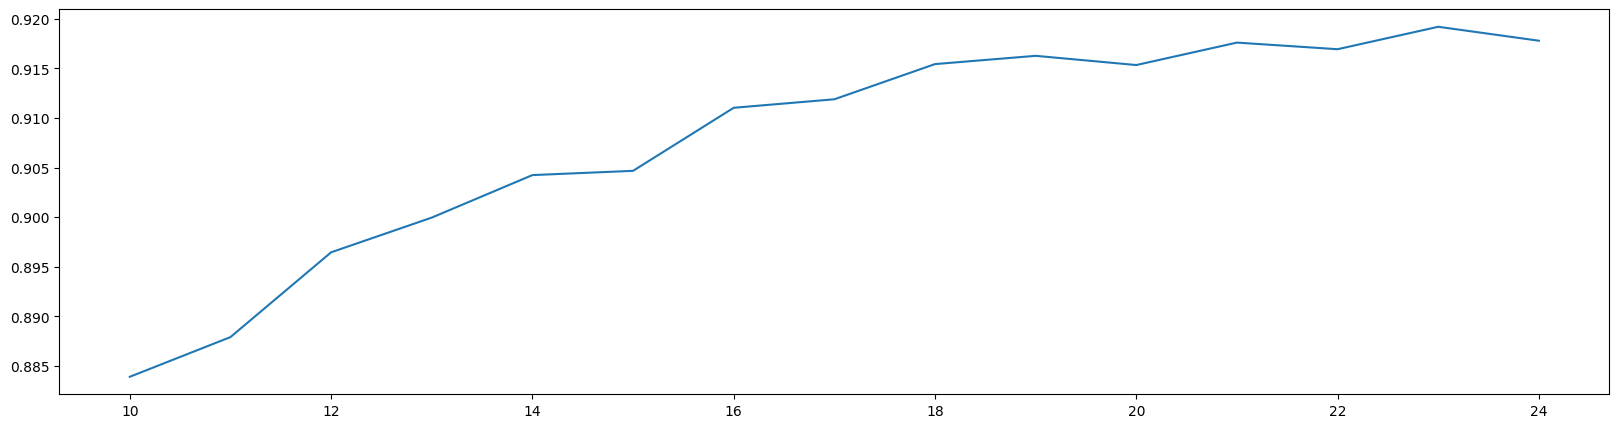

In [12]:
score = []
for i in range(10, 25):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10, random_state=0), X_dr, y, cv=5).mean()
    score.append(once)
plt.figure(figsize=[20, 5])
plt.plot(range(10, 25), score)
plt.show()

In [13]:
X_dr = PCA(23).fit_transform(X)

In [14]:
X_dr.shape

(42000, 23)

In [15]:
cross_val_score(RFC(n_estimators=100, random_state=0), X_dr, y, cv=5).mean()

0.9461190476190475

In [19]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [20]:
cross_val_score(KNN(), X_dr, y, cv=5).mean()

0.9700238095238095

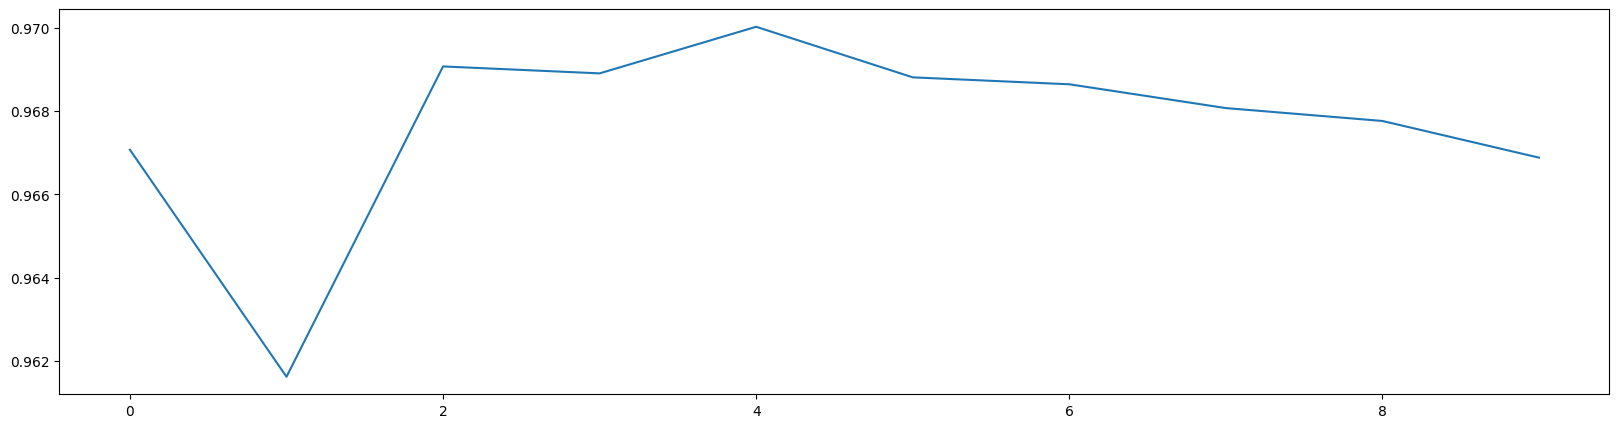

In [21]:
score = []
for i in range(10):
    once = cross_val_score(KNN(i + 1), X_dr, y, cv=5).mean()
    score.append(once)
plt.figure(figsize=[20, 5])
plt.plot(range(10), score)

In [23]:
plt.show()

In [24]:
cross_val_score(KNN(4), X_dr, y, cv=5).mean()

0.9689047619047619